# Stage 03 - Supervised Learning

## Data Pre-Processing

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

### Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

In [3]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx')
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [4]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Handling Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
for i in df.columns:
    percent = round(df[i].isna().sum()*100/len(df[i]),2)
    print(f'''Kolom {i}:''')
    print('Missing values :',df[i].isna().sum(),'dari ',len(df))
    print(f'''Presentase missing value:''',percent, '%')
    print('---'*10)

Kolom CustomerID:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Churn:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Tenure:
Missing values : 264 dari  5630
Presentase missing value: 4.69 %
------------------------------
Kolom PreferredLoginDevice:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom CityTier:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom WarehouseToHome:
Missing values : 251 dari  5630
Presentase missing value: 4.46 %
------------------------------
Kolom PreferredPaymentMode:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Gender:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom HourSpendOnApp:
Missing values : 255 dari  5630
Presentase missing value: 4.53 %
---------

In [8]:
import plotly.express as px

# Hitung persentase nilai yang hilang untuk setiap kolom
missing_percentages = (df.isna().sum() * 100 / len(df)).round(2)

# Buat DataFrame baru untuk digunakan dalam plotly
missing_df = pd.DataFrame({'Column': missing_percentages.index, 'MissingPercentage': missing_percentages.values})

# Buat horizontal bar chart interaktif menggunakan Plotly Express
fig = px.bar(missing_df, x='MissingPercentage', y='Column', text='MissingPercentage', orientation='h',
             title='Persentase Missing Value per Kolom', labels={'MissingPercentage': 'Persentase Missing Value'})

# Ganti warna menjadi merah
fig.update_traces(texttemplate='%{text}%', textposition='inside', marker_color='red')

# Atur parameter tampilan dan layout
fig.update_xaxes(title_text='Persentase Missing Value')
fig.update_yaxes(title_text='Kolom')

# Tampilkan plot
fig.show()


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [10]:
df2 = df.copy() #Mencopy dataframe

In [11]:
#Mengganti Phone -> Mobile Phone untuk menghilangkan redundansi data
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

In [12]:
# Mengganti CC -> Credit Card & Cash on Delivery -> COD untuk menghilangkan redundansi data
df2['PreferredPaymentMode'] = df2['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

In [13]:
#Mengganti Mobile -> Tablet untuk menghilangkan redundansi data
df2['PreferedOrderCat'] = df2['PreferedOrderCat'].replace({'Mobile' : 'Tablet'})

In [14]:
df2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Tablet,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Tablet,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Tablet,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### Dropna

Alasan menghapus Missing Values menggunakan dropna() dikarenakan:

- Menghilangkan Baris dengan Missing Values: dropna() digunakan untuk menghilangkan baris (entries) yang mengandung setidaknya satu missing value. Ini berguna jika kita ingin fokus pada data yang lengkap dan tidak ingin mengabaikan missing values.

- Menghindari Error: Ketika kita menjalankan analisis statistik atau pemodelan, missing values dapat menyebabkan error. Dengan menghapusnya, kita dapat memastikan bahwa analisis atau pemodelan berjalan dengan baik.

- Mengurangi Noise: Missing values dapat mempengaruhi hasil analisis data. Dengan menghapusnya, kita dapat mengurangi "noise" dalam data dan mendapatkan hasil yang lebih konsisten.


In [15]:
df2 = df.dropna()
df2 = df.dropna(subset=['Tenure', 'WarehouseToHome','HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'])
df2.dropna(inplace=True)
df2.dropna(subset=['Tenure', 'WarehouseToHome','HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'], inplace=True)

In [16]:
# Mengecek kembali apakah imputasi data sudah berhasil
df2.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [17]:
# Melihat value count variabel numerical
for col in nums:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerID:
50001    1
53991    1
53976    1
53977    1
53978    1
        ..
52220    1
52221    1
52223    1
52224    1
55630    1
Name: CustomerID, Length: 3774, dtype: int64

Presentase :
 50001    0.03
53991    0.03
53976    0.03
53977    0.03
53978    0.03
         ... 
52220    0.03
52221    0.03
52223    0.03
52224    0.03
55630    0.03
Name: CustomerID, Length: 3774, dtype: float64
------------------------------

Value count kolom Churn:
0    3143
1     631
Name: Churn, dtype: int64

Presentase :
 0    83.28
1    16.72
Name: Churn, dtype: float64
------------------------------

Value count kolom Tenure:
1.0     642
0.0     303
8.0     217
9.0     202
7.0     178
10.0    168
3.0     161
5.0     156
4.0     154
12.0    143
11.0    140
6.0     135
2.0     135
14.0    117
13.0    117
15.0    101
16.0    101
18.0     87
19.0     85
17.0     61
20.0     50
21.0     40
22.0     39
30.0     39
23.0     32
27.0     32
25.0     26
26.0     24
28.0     23
31.0     23
24

In [18]:
# Melihat value count variable categorical
for col in cats:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    1936
Computer        1111
Phone            727
Name: PreferredLoginDevice, dtype: int64

Presentase :
 Mobile Phone    51.30
Computer        29.44
Phone           19.26
Name: PreferredLoginDevice, dtype: float64
------------------------------

Value count kolom PreferredPaymentMode:
Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: PreferredPaymentMode, dtype: int64

Presentase :
 Debit Card          40.75
Credit Card         29.78
E wallet            11.74
COD                  7.98
UPI                  7.55
Cash on Delivery     1.27
CC                   0.93
Name: PreferredPaymentMode, dtype: float64
------------------------------

Value count kolom Gender:
Male      2271
Female    1503
Name: Gender, dtype: int64

Presentase :
 Male      60.17
Female    39.83
Name: Gender, dtype: float64
-------------

### Handling Duplicated Data

In [19]:
df2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41


In [20]:
df2.duplicated().sum()

0

tidak ada data duplikasi

### Outlier

In [21]:
from scipy import stats

In [22]:
initial_row_count = len(df2)

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
    zscore = abs(stats.zscore(df2[col]))
    filtered_entries = (zscore < 3)
    df2 = df2[filtered_entries]

final_row_count = len(df2)
num_outliers = initial_row_count - final_row_count

print(f'Jumlah baris sebelum memfilter outlier: {initial_row_count}')
print(f'Jumlah baris setelah memfilter outlier: {final_row_count}')
percentage_outliers = (num_outliers / initial_row_count) * 100
print(f'Presentase data yang dihapus: {percentage_outliers:.2f}%')

Jumlah baris sebelum memfilter outlier: 3774
Jumlah baris setelah memfilter outlier: 3615
Presentase data yang dihapus: 4.21%


### Feature Encoding

In [23]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df2['Gender'] = df2['Gender'].map(mapping_gender)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
for cat in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']:
  onehots = pd.get_dummies(df2[cat], prefix=cat)
  df2 = df2.join(onehots)

In [26]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df2 = df2.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']).copy()

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3615 entries, 0 to 5629
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3615 non-null   int64  
 1   Churn                                  3615 non-null   int64  
 2   Tenure                                 3615 non-null   float64
 3   CityTier                               3615 non-null   int64  
 4   WarehouseToHome                        3615 non-null   float64
 5   Gender                                 3615 non-null   int64  
 6   HourSpendOnApp                         3615 non-null   float64
 7   NumberOfDeviceRegistered               3615 non-null   int64  
 8   SatisfactionScore                      3615 non-null   int64  
 9   NumberOfAddress                        3615 non-null   int64  
 10  Complain                               3615 non-null   int64  
 11  Orde

In [28]:
df2.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,0,0,0,0,1,0,0,0,0,1
5,50006,1,0.0,1,22.0,0,3.0,5,5,2,...,0,0,0,0,0,0,1,0,0,1
11,50012,1,11.0,1,6.0,1,3.0,4,3,10,...,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,1,11.0,1,2.0,3,3,2,...,0,0,0,0,0,1,0,0,0,1


### Feature Transformation

In [29]:
from scipy.stats import skew, kurtosis

In [30]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df2[i])
  kts = kurtosis(df2[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount']
Distribusi Non Normal: ['CouponUsed', 'OrderCount']


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
feature = df2.columns.tolist()
del feature[:2]
feature

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredLoginDevice_Phone',
 'PreferredPaymentMode_CC',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Cash on Delivery',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [33]:
transform = feature_normal + feature_non_normal
X = df2[feature]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
for i in transform:
  scaler = StandardScaler().fit(X_train[[i]])
  X_train[i] = scaler.transform(X_train[[i]])
  X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3103,0.996289,-0.760232,2.336939,0,0.033998,1.219556,-0.730600,-0.871450,-0.62887,-1.011140,...,0,0,0,0,1,0,0,1,0,0
5026,0.729190,1.372125,-0.814560,1,1.421339,0.250195,0.718571,1.116260,-0.62887,-0.736627,...,0,0,0,0,1,0,0,0,1,0
2043,-0.072106,1.372125,1.003612,0,-1.353343,-0.719167,-0.006014,-0.871450,-0.62887,0.086911,...,0,0,0,0,1,0,0,0,1,0
3860,-1.006952,-0.760232,-0.814560,1,0.033998,0.250195,-1.455185,-0.076366,-0.62887,-0.462115,...,0,0,0,0,0,0,1,0,0,1
5023,-0.205655,0.305947,-0.814560,1,1.421339,0.250195,-0.006014,-0.473908,-0.62887,-0.462115,...,0,1,0,0,0,0,1,0,1,0


In [36]:
df2.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,...,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000,3615.000000
mean,53016.013555,0.167358,8.588658,1.708990,15.734440,0.605256,2.977870,3.747441,3.048133,4.232642,...,0.118396,0.075519,0.112863,0.000277,0.523928,0.032089,0.330844,0.143292,0.522545,0.334163
std,1609.105080,0.373347,7.545533,0.936243,8.217422,0.488863,0.721676,1.026815,1.388109,2.563059,...,0.323121,0.264263,0.316469,0.016632,0.499496,0.176260,0.470582,0.350419,0.499561,0.471762
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51651.500000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53153.000000,0.000000,7.000000,1.000000,14.000000,1.000000,3.000000,4.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,54392.000000,0.000000,13.000000,3.000000,21.000000,1.000000,3.000000,4.000000,4.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,55630.000000,1.000000,31.000000,3.000000,36.000000,1.000000,5.000000,6.000000,5.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Class Imbalance

Karena target klasifikasi pada pemodelan yang akan dilakukan menggunakan kolom churn, maka perlu dicek dahulu apakah kolom churn memiliki data yang imbalanced atau balanced.

In [37]:
df2['Churn_Class'] = df2['Churn']>0.9
print(df2['Churn_Class'].value_counts())
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical

False    3010
True      605
Name: Churn_Class, dtype: int64


In [38]:
x = df2[[col for col in df2.columns if col not in ['Churn_Class','Churn']]].values
y = df2['Churn_Class'].values
print(x.shape)
print(y.shape)
#Pemisahan feature dan target

(3615, 33)
(3615,)


In [39]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Buat objek RandomUnderSampler dengan sampling strategy 1.0 (menjaga jumlah sampel kelas minoritas)
rus = RandomUnderSampler(sampling_strategy=1.0)
x_under, y_under = rus.fit_resample(X, y)

# Buat objek RandomOverSampler dengan sampling strategy 1.0 (menjaga jumlah sampel kelas minoritas)
ros = RandomOverSampler(sampling_strategy=1.0)
x_over, y_over = ros.fit_resample(X, y)

# Buat objek SMOTE (Synthetic Minority Over-sampling Technique) tanpa mengatur sampling strategy
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [40]:
print(pd.Series(y).value_counts())

False    3010
True      605
dtype: int64


In [41]:
print(pd.Series(y_over).value_counts())

True     3010
False    3010
dtype: int64


In [42]:
print(pd.Series(y_under).value_counts())

False    605
True     605
dtype: int64


In [43]:
print(pd.Series(y_smote).value_counts())

True     3010
False    3010
dtype: int64


### Feature selection##

In [44]:
df3 = df2.copy() #Mencopy dataframe

In [45]:
df3.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn_Class
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,0,1,0,0,0,0,1,True
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,0,0,0,1,0,0,0,0,1,True
5,50006,1,0.0,1,22.0,0,3.0,5,5,2,...,0,0,0,0,0,1,0,0,1,True
11,50012,1,11.0,1,6.0,1,3.0,4,3,10,...,0,1,0,0,0,0,0,0,1,True
12,50013,1,0.0,1,11.0,1,2.0,3,3,2,...,0,0,0,0,1,0,0,0,1,True


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Menggunakan mutual information untuk seleksi fitur
selector = SelectKBest(mutual_info_classif, k=6)  # kita ingin memilih 6 fitur terbaik
X_new = selector.fit_transform(X, y)

# Mendapatkan indeks fitur terbaik
best_feature_indices = selector.get_support(indices=True)
best_features = X.columns[best_feature_indices]

# Menampilkan fitur terbaik
print("Fitur Terbaik:")
print(best_features)

Fitur Terbaik:
Index(['Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Married'],
      dtype='object')


Beberapa insight yang dapat diperoleh ini adalah:

- Tenure adalah Fitur Paling penting: kita bisa melihat bahwa "Tenure" memiliki mutual_info_classif yang jauh lebih tinggi dibandingkan dengan fitur lainnya. Diikuti Complain ini menunjukkan bahwa Complain dan lamanya pelanggan berlangganan memiliki dampak yang signifikan pada keputusan churn. Dengan kata lain, pelanggan yang telah berlangganan lebih lama cenderung kurang cenderung untuk berhenti berlangganan dan pelanggan yang sering mengajukan keluhan mungkin memiliki kecenderungan lebih tinggi untuk churn.

- DaySinceLastOrder Score dan CashbackAmount: Fitur "DaySinceLastOrder" juga memiliki  mutual_info_classif yang cukup tinggi, menunjukkan bahwa Jumlah hari sejak pesanan terakhir dapat mengindikasikan tingkat keterlibatan pelanggan. Pelanggan yang sering melakukan pesanan mungkin memiliki periode waktu yang lebih pendek antara pesanan, dan ini bisa menjadi faktor yang memengaruhi keputusan mereka untuk tetap berlangganan. Selain itu, fitur "CashbackAmount" juga memiliki kontribusi yang signifikan, menunjukkan bahwa Pelanggan yang menerima lebih banyak cashback mungkin lebih cenderung tetap berlangganan, terutama jika mereka merasa mendapatkan manfaat finansial.

- Fitur Kategoris: Fitur kategoris seperti "PreferredLoginDevice," "PreferredPaymentMode," "Gender," "MaritalStatus," "CityTier,", 'Churn_Class' dan "NumberOfAddress" juga berkontribusi dalam memprediksi churn.

Dengan informasi ini, kita dapat mempertimbangkan untuk memprioritaskan fitur-fitur ini dalam membangun model prediksi churn. Penyesuaian model berdasarkan insight ini dapat membantu perusahaan dalam mengurangi churn pelanggan.

**Tidak ada feature yang akan di hapus karena kami menanggap semua feature penting**

### Feature Extraction

In [47]:
# Membuat fitur TotalSpending (kali OrderAmountHikeFromlastYear dengan CouponUsed)
df3['TotalSpending'] = df3['OrderAmountHikeFromlastYear'] * df3['CouponUsed']

# Membuat fitur CustomerCategory berdasarkan TotalSpending
def categorize_customer(row):
    if row['TotalSpending'] >= 2:
        return "Pengguna Aktif"
    else:
        return "Pengguna Tidak Aktif"

df3['CustomerCategory'] = df3.apply(categorize_customer, axis=1)

# Membuat fitur MeanOrderAmountHikeFromlastYear berdasarkan rata-rata OrderAmountHike
mean_order_amount_hike = df2['OrderAmountHikeFromlastYear'].mean()
df3['MeanOrderAmountHikeFromlastYear'] = mean_order_amount_hike

# Membuat fitur baru berdasarkan interaksi antara OrderAmountHikeFromlastYear dan CouponUsed
df3['OrderAmountHike_Coupon_Interact'] = df3['OrderAmountHikeFromlastYear'] * df3['CouponUsed']

df3['Tenure_Category'] = pd.cut(df3['Tenure'], bins=[0, 6, 12, 24,], labels=['New', 'Pelanggan menengah','Loyal customers'])

df3['DaySinceLastOrder_Category'] = pd.cut(df3['DaySinceLastOrder'], bins=[0, 5, 10], labels=['baru', 'lama',])

**TotalSpending:**
- Fitur TotalSpending dibuat dengan mengalikan OrderAmountHikeFromlastYear dengan CouponUsed.
- *Insight:* Ini bisa digunakan untuk mengidentifikasi total pengeluaran pelanggan berdasarkan kenaikan jumlah pesanan dan kupon yang digunakan.

**CustomerCategory :**

- Fitur CustomerCategory dibuat dengan membagi pelanggan menjadi "Pengguna Aktif" jika total pengeluaran lebih besar atau sama dengan 2, dan "Pengguna Tidak Aktif" jika sebaliknya.
- *Insight:* Ini membantu dalam mengelompokkan pelanggan menjadi dua kategori berdasarkan perilaku pengeluaran mereka.

**MeanOrderAmountHikeFromlastYear:**

- Fitur MeanOrderAmountHikeFromlastYear dibuat dengan mengambil rata-rata dari OrderAmountHikeFromlastYear untuk seluruh data.
- *Insight:* Ini memberikan nilai rata-rata kenaikan jumlah pesanan dari tahun lalu, yang dapat digunakan sebagai pembanding.

**OrderAmountHike_Coupon_Interact:**

- Fitur OrderAmountHike_Coupon_Interact dibuat dengan mengalikan OrderAmountHikeFromlastYear dengan CouponUsed.
- *Insight:* Ini menciptakan fitur yang mencerminkan interaksi antara kenaikan jumlah pesanan dan penggunaan kupon, Fitur ini melihat bagaimana kenaikan jumlah pesanan dapat dipengaruhi oleh penggunaan kupon.

**Tenure_Category:**

- Fitur Tenure_Category (Kategori Masa Tenure): Ini adalah fitur kategoris yang menggambarkan kategori masa "Tenure" pelanggan. Pelanggan dibagi menjadi "New" (baru), "Pelanggan menengah" (6-12 bulan), dan "Loyal customers" (lebih dari 12 bulan) berdasarkan "Tenure" mereka.

- *Insight:* Dengan kategori "Tenure," dapat dengan mudah mengidentifikasi kelompok pelanggan berdasarkan seberapa lama mereka menjadi pelanggan Anda.

In [48]:
# Isi nilai NaN pada kolom kategori dengan mode
df3['DaySinceLastOrder_Category'].fillna(df3['DaySinceLastOrder_Category'].mode()[0], inplace=True)

In [49]:
# Menggunakan join untuk menggabungkan kolom
df3[['DaySinceLastOrder']].join(df3[['DaySinceLastOrder_Category']])

,DaySinceLastOrder,DaySinceLastOrder_Category
0,5.0,baru
3,3.0,baru
5,7.0,lama
11,0.0,baru
12,2.0,baru
...,...,...
5624,1.0,baru
5625,4.0,baru
5627,4.0,baru
5628,9.0,lama


In [50]:
# Isi nilai NaN pada kolom kategori dengan mode
df3['Tenure_Category'].fillna(df3['Tenure_Category'].mode()[0], inplace=True)

In [51]:
# Menggunakan join untuk menggabungkan kolom
df3[['Tenure']].join(df3[['Tenure_Category']])

,Tenure,Tenure_Category
0,4.0,New
3,0.0,New
5,0.0,New
11,11.0,Pelanggan menengah
12,0.0,New
...,...,...
5624,1.0,New
5625,10.0,Pelanggan menengah
5627,1.0,New
5628,23.0,Loyal customers


In [52]:
df3.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn_Class,TotalSpending,CustomerCategory,MeanOrderAmountHikeFromlastYear,OrderAmountHike_Coupon_Interact,Tenure_Category,DaySinceLastOrder_Category
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,1,True,11.0,Pengguna Aktif,15.716736,11.0,New,baru
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,0,0,1,True,0.0,Pengguna Tidak Aktif,15.716736,0.0,New,baru
5,50006,1,0.0,1,22.0,0,3.0,5,5,2,...,0,0,1,True,88.0,Pengguna Aktif,15.716736,88.0,New,lama
11,50012,1,11.0,1,6.0,1,3.0,4,3,10,...,0,0,1,True,0.0,Pengguna Tidak Aktif,15.716736,0.0,Pelanggan menengah,baru
12,50013,1,0.0,1,11.0,1,2.0,3,3,2,...,0,0,1,True,26.0,Pengguna Aktif,15.716736,26.0,New,baru


### Fitur tambahan

ide tambahan untuk fitur yang mungkin dapat meningkatkan performansi model:

- Frekuensi Pembelian: Ini adalah fitur yang mencerminkan seberapa sering pelanggan melakukan pembelian. Frekuensi pembelian yang tinggi mungkin mengindikasikan pelanggan yang setia dan berpotensi menjadi "Pengguna Aktif."

- Jumlah Kategori Produk yang Dibeli: Fitur ini dapat mencerminkan variasi preferensi produk pelanggan. Jika seorang pelanggan sering membeli dari berbagai kategori produk, ini bisa menjadi indikasi keberagaman minatnya.

- Keterlibatan dalam Program Loyalitas: Ini adalah fitur yang mencerminkan apakah pelanggan terlibat dalam program loyalitas, seperti pengumpulan poin atau diskon eksklusif. Keterlibatan dalam program ini mungkin berhubungan dengan retensi pelanggan.

- Interaksi dengan Aplikasi atau Situs Web: Mengukur berapa lama pelanggan menghabiskan waktu di aplikasi atau situs web Anda, atau seberapa sering mereka masuk, dapat memberikan wawasan tentang keterlibatan pelanggan.

### Treatment untuk feature baru

#### Descriptive Statistics

In [53]:
df3.isna().sum()

CustomerID                               0
Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_CC                  0
PreferredPaymentMode_COD                 0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPa

In [54]:
# mengekspor data ke file excel
df3.to_excel('extracted_features.xlsx', index=False)

In [55]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df3.columns:
  if df3[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['CustomerCategory']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Churn_Class', 'TotalSpending', 'MeanOrderAmountHikeFromlastYear', 'OrderAmountHike_Coupon_Interact', 'Tenure_Category', 'Da

#### EDA

###### Persentase Churn berdasarkan Tenure_Category

In [56]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Churn berdasarkan Tenure_Category
churn_percent = (df3.groupby(['Tenure_Category', 'Churn']).size() / df3.groupby('Tenure_Category').size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='Tenure_Category', y='Percentage', color='Churn', text='Percentage', title='Churn Percentage by Tenure Category', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()


Dari grafik Churn Percentage by Tenure Category, kita dapat mengamati beberapa insight yang menarik:

- Kategori Tenure dan Churn Percentage: Grafik tersebut membagi kategori "Tenure" menjadi beberapa grup, dan menggambarkan persentase "Churn" di setiap grup. Dapat dilihat bahwa untuk kategori "Tenure" yang lebih rendah, seperti "0-6 Bulan" dan "6-12 Bulan", persentase "Churn" lebih tinggi. Ini menunjukkan bahwa pelanggan dengan tenur yang lebih pendek cenderung cenderung untuk berhenti berlangganan dibandingkan dengan pelanggan dengan tenur yang lebih lama.

- Kategori Tenure "12+ Bulan": Kategori "Tenure" yang memiliki tenur lebih dari 12 bulan memiliki persentase "Churn" yang sangat rendah, hampir mendekati nol. Ini mengindikasikan bahwa pelanggan dengan tenure yang lebih lama cenderung tetap setia dan tidak berhenti berlangganan.

- Tingkat Tenure Mempengaruhi Churn: Insight ini menunjukkan pentingnya mempertahankan pelanggan selama periode tenure awal, seperti 0-6 bulan. Upaya retensi pelanggan mungkin perlu ditingkatkan pada periode ini.

###### Persentase Churn berdasarkan Tenure_Category, Complain, dan Churn

In [57]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Churn berdasarkan Tenure_Category, Complain, dan Churn
churn_percent = (df3.groupby(['Tenure_Category', 'Complain', 'Churn']).size() / df3.groupby(['Tenure_Category', 'Complain']).size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='Tenure_Category', y='Percentage', color='Churn', facet_col='Complain', text='Percentage', title='Churn Percentage by Tenure Category and Complain', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()


**Dari grafik "Churn Percentage by Tenure Category and Complain", kita dapat mengamati beberapa insight yang menarik:**

>- Pengaruh Tenure pada Churn: Grafik ini mempertimbangkan efek dari kategori "Tenure" (lama berlangganan) pada persentase "Churn". Terlihat bahwa kategori "Tenure" yang lebih pendek, seperti "0-6 Bulan" dan "6-12 Bulan", memiliki persentase "Churn" yang lebih tinggi, terutama ketika tidak ada keluhan (Complain = 0). Ini menunjukkan bahwa pelanggan dengan tenur lebih pendek cenderung berhenti berlangganan lebih sering.
- Efek Keluhan pada Churn: Dalam kategori "Tenure" yang sama, kita juga melihat efek dari keluhan pelanggan (Complain) terhadap persentase "Churn". Terlihat bahwa persentase "Churn" lebih tinggi ketika ada keluhan (Complain = 1), terlepas dari kategori "Tenure". Ini menunjukkan bahwa keluhan pelanggan dapat menjadi faktor penting dalam keputusan pelanggan untuk berhenti berlangganan.
- Strategi Retensi Pelanggan: Berdasarkan hasil ini, strategi retensi pelanggan yang sukses mungkin melibatkan upaya untuk memperpanjang tenure pelanggan, terutama dalam kategori "0-6 Bulan", dan mengelola dan merespons keluhan pelanggan dengan efektif.
- Tenure_Catagory yang memiliki kategori pelanggan 'New' (0-6 bulan) yang mengajukan Complain memiliki tingkat churn yang tinggi yakni 50.55%, diikuti oleh pelanggan yang memiliki kategori 'New' yang tidak mengajukan keluhan yakni sebesar 18.77%.


Grafik ini memberikan wawasan awal tentang bagaimana kategori tenure dan keluhan pelanggan berdampak pada tingkat churn, dan hal ini dapat membantu perusahaan untuk lebih memperhatikan pelanggan dengan masa berlangganan (0-6 bulan) yang cenderung untuk churn. Ini menandakan Tenure merupakan faktor utama yang mengakibatkan churn, perlu analisis lebih jauh lagi untuk mengetahui kenapa pelanggan baru lebih banyak yang cenderung untuk churn, dan keluhan apa yang sering diajukan oleh costumer untuk bisa mengurangi tingkat churn sesuai dengan Target yang telah kami tetapkan.

### Persentase Churn berdasarkan CustomerCategory, Complain, dan Churn

In [58]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Churn berdasarkan CustomerCategory, Complain, dan Churn
churn_percent = (df3.groupby(['CustomerCategory', 'Complain', 'Churn']).size() / df3.groupby(['CustomerCategory', 'Complain']).size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='CustomerCategory', y='Percentage', color='Churn', facet_col='Complain', text='Percentage', title='Churn Percentage by PreferedOrderCat, Complain, and Churn', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()

**Beberapa insight menarik dari grafik ini:**

>- Pola Churn Berdasarkan 'CustomerCategory': Grafik tersebut memungkinkan kita untuk melihat bagaimana Churn dipengaruhi oleh 'CustomerCategory'.
Berdasarkan grafik, kita dapat melihat bahwa Churn lebih tinggi pada 'CustomerCategory' tertentu dibandingkan yang lain. Ini dapat menjadi insight penting untuk strategi retensi pelanggan.
- Efek Keluhan (Complain) pada Churn: Dalam grafik yang difasilitasi oleh pemisahan ('facet_col') berdasarkan 'Complain', kita dapat melihat perbedaan dalam Churn antara pelanggan yang mengajukan keluhan dan yang tidak. Hal ini membantu kita memahami apakah pelanggan yang mengajukan keluhan cenderung lebih cenderung untuk Churn.
- Peluang Segmentasi Pelanggan: Grafik ini juga dapat membantu dalam segmentasi pelanggan. Dapat dilihat bahwa  'CustomerCategory' pengguna aktif memiliki tingkat Churn yang tinggi yaitu 33.53%, sementara untuk pengguna tidak aktif memiliki tingkat Churn yang rendah yakni 20.12%. Ini dapat menjadi dasar untuk mengembangkan strategi berbeda untuk setiap segmen pelanggan.
- Akan tetapi berkebalikan untuk pelanggan yang tidak mengajukan complain 'CustomerCategory' untuk pelanggan yang tidak aktif memiliki tingkat churn yang tinggi yakni 11.72%, dan untuk pelanggan aktifnya di dapatkan presentase sebesar 10.87%.
- Optimasi Respon terhadap Keluhan: Jika kita menemukan bahwa pelanggan yang mengajukan keluhan cenderung Churn, maka kita dapat mempertimbangkan untuk meningkatkan respons terhadap keluhan pelanggan. Ini dapat membantu meminimalkan Churn dalam kelompok ini.

Dapat disimpulkan bahwa complain mungkin hal yang sangat mempengaruhi pelanggan untuk churn, namun perlu juga analisis lebih jauh faktor yang lainnya untuk penyebab dari churn nya.

### Persentase Churn berdasarkan SatisfactionScore, Complain, dan Churn

In [59]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Churn berdasarkan SatisfactionScore, Complain, dan Churn
churn_percent = (df3.groupby(['SatisfactionScore', 'Complain', 'Churn']).size() / df3.groupby(['SatisfactionScore', 'Complain']).size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='SatisfactionScore', y='Percentage', color='Churn', facet_col='Complain', text='Percentage', title='Churn Percentage by SatisfactionScore, Complain, and Churn', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()

**Berikut beberapa insight yang dapat diambil :**

>- Pengaruh Kepuasan Pelanggan: Dari grafik tersebut, kita dapat melihat bahwa pelanggan dengan skor kepuasan tinggi (SatisfactionScore tinggi) cenderung memiliki tingkat Churn yang lebih rendah. Ini menunjukkan bahwa meningkatkan kepuasan pelanggan dapat membantu mengurangi tingkat Churn.
- Efek Keluhan pada Churn: Melalui pemisahan berdasarkan "Complain," kita dapat membandingkan Churn antara pelanggan yang mengajukan keluhan dan yang tidak. Grafik menunjukkan bahwa pelanggan yang tidak mengajukan keluhan cenderung memiliki tingkat Churn yang lebih rendah. Hal ini dapat mengindikasikan bahwa penting untuk mengelola dan menangani keluhan pelanggan dengan baik untuk meminimalkan Churn.
- Segmentasi Pelanggan: Grafik ini juga memungkinkan segmentasi pelanggan berdasarkan kepuasan dan keluhan. Hal ini dapat membantu dalam merancang strategi yang lebih terfokus untuk setiap segmen pelanggan.
- Penyempurnaan Strategi Retensi: Dengan memahami hubungan antara kepuasan pelanggan, keluhan, dan Churn, perusahaan dapat mengembangkan strategi retensi yang lebih efektif. Misalnya, meningkatkan layanan pelanggan atau mengurangi faktor-faktor yang menyebabkan keluhan.
- Mengukur Efektivitas Strategi: Grafik ini juga dapat digunakan untuk mengukur efektivitas strategi yang telah diterapkan. Jika tidak ada perubahan yang signifikan dalam tingkat Churn setelah perbaikan layanan pelanggan, hal ini dapat menjadi pertimbangan untuk meninjau kembali tindakan yang diambil.

Grafik ini memberikan pandangan yang lebih mendalam tentang bagaimana kepuasan pelanggan dan keluhan memengaruhi Churn, dan dapat digunakan sebagai dasar untuk mengambil tindakan yang lebih baik dalam meminimalkan Churn dan meningkatkan retensi pelanggan.

In [60]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Churn berdasarkan DaySinceLastOrder_Category, Complain, dan Churn
churn_percent = (df3.groupby(['DaySinceLastOrder_Category', 'Complain', 'Churn']).size() / df3.groupby(['DaySinceLastOrder_Category', 'Complain']).size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='DaySinceLastOrder_Category', y='Percentage', color='Churn', facet_col='Complain', text='Percentage', title='Churn Percentage by DaySinceLastOrder_Category, Complain, and Churn', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()

**Berikut adalah beberapa insight yang dapat diambil dari grafik ini:**

>- Pengaruh Waktu Sejak Pesanan Terakhir: Grafik menunjukkan bahwa pelanggan dengan waktu sejak pesanan terakhir yang lebih singkat cenderung memiliki tingkat Churn yang lebih tinggi. Hal ini mungkin mengindikasikan bahwa pelanggan yang sering berbelanja atau berinteraksi lebih sering cenderung tetap setia. Oleh karena itu, mempertahankan interaksi reguler dengan pelanggan mungkin membantu mengurangi Churn.
- Efek Keluhan pada Churn: Seperti sebelumnya, grafik ini juga membandingkan Churn antara pelanggan yang mengajukan keluhan dan yang tidak. Pelanggan yang mengajukan keluhan masih memiliki tingkat Churn yang lebih tinggi daripada yang tidak mengajukan keluhan. Hal ini menegaskan pentingnya penanganan keluhan pelanggan dengan baik untuk mengurangi Churn.
- Segmentasi Pelanggan: Dengan menggunakan "DaySinceLastOrder_Category" dan "Complain," perusahaan dapat melakukan segmentasi pelanggan berdasarkan seberapa sering mereka berinteraksi dan apakah mereka mengajukan keluhan. Ini dapat membantu dalam merancang strategi yang lebih sesuai untuk masing-masing segmen.
- Optimasi Kebijakan Retensi: Informasi ini dapat digunakan untuk mengoptimalkan kebijakan retensi, seperti memberikan insentif atau penawaran khusus kepada pelanggan yang memiliki waktu sejak pesanan terakhir yang lama.
- Mengukur Kinerja Bisnis: Perusahaan dapat menggunakan grafik ini sebagai alat untuk mengukur dampak perubahan kebijakan atau tindakan yang diambil dalam upaya untuk mengurangi Churn.

Grafik ini memberikan pemahaman yang lebih mendalam tentang bagaimana waktu dan keluhan memengaruhi Churn, yang dapat membantu perusahaan dalam merancang strategi yang lebih baik untuk meningkatkan retensi pelanggan.

### Persentase Churn berdasarkan DaySinceLastOrder_Category, Tenure_Category, dan Churn

In [61]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Churn berdasarkan DaySinceLastOrder_Category, Tenure_Category, dan Churn
churn_percent = (df3.groupby(['DaySinceLastOrder_Category', 'Tenure_Category', 'Churn']).size() / df3.groupby(['DaySinceLastOrder_Category', 'Tenure_Category']).size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='DaySinceLastOrder_Category', y='Percentage', color='Churn', facet_col='Tenure_Category', text='Percentage', title='Churn Percentage by DaySinceLastOrder_Category, Tenure_Category, and Churn', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()

**Berikut adalah beberapa insight yang dapat diambil dari grafik ini:**

>- Hubungan Waktu dan Tenure: Grafik memungkinkan kita untuk melihat bagaimana kombinasi waktu sejak pesanan terakhir ("DaySinceLastOrder_Category") dan tenur pelanggan ("Tenure_Category") memengaruhi Churn. Ini memberikan wawasan tentang apakah pelanggan dengan tenur yang berbeda menunjukkan tren yang berbeda dalam hal Churn berdasarkan waktu sejak pesanan terakhir.
- Segmentasi Pelanggan yang Lebih Spesifik: Dengan segmentasi pelanggan ke dalam berbagai kategori ini, perusahaan dapat memahami lebih baik perilaku pelanggan. Misalnya, apakah pelanggan dengan tenur yang lebih lama lebih cenderung tetap setia, atau apakah pelanggan dengan waktu sejak pesanan terakhir yang lebih singkat memiliki tingkat Churn yang lebih tinggi.
- Optimasi Strategi Retensi: Informasi ini dapat membantu dalam merancang strategi retensi yang lebih sesuai untuk masing-masing segmen. Misalnya, pelanggan dengan tenur yang lebih lama mungkin memerlukan program loyalitas yang berbeda dibandingkan dengan pelanggan dengan tenur yang lebih pendek.
- Identifikasi Tren Churn: Grafik ini juga dapat membantu dalam mengidentifikasi tren Churn, misalnya, apakah ada peningkatan Churn pada pelanggan dengan waktu sejak pesanan terakhir yang sangat lama, terlepas dari tenur.

Dengan memahami bagaimana waktu sejak pesanan terakhir dan tenur pelanggan saling berinteraksi, perusahaan dapat mengambil tindakan yang lebih terfokus untuk mengurangi Churn dan mempertahankan pelanggan.

### Persentase Complain berdasarkan SatisfactionScore, DaySinceLastOrder_Category, dan Complain

In [ ]:
import plotly.express as px
import pandas as pd

# Menghitung persentase Complain berdasarkan SatisfactionScore, DaySinceLastOrder_Category, dan Complain
churn_percent = (df3.groupby(['SatisfactionScore', 'DaySinceLastOrder_Category', 'Complain']).size() / df3.groupby(['SatisfactionScore', 'DaySinceLastOrder_Category']).size() * 100).reset_index(name='Percentage')

# Membuat grafik interaktif dengan Plotly
fig = px.bar(churn_percent, x='DaySinceLastOrder_Category', y='Percentage', color='Complain', facet_col='DaySinceLastOrder_Category', text='Percentage', title='Complain Percentage by DaySinceLastOrder_Category, SatisfactionScore, and Complain', labels={'Percentage': 'Churn Percentage'})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()

**Berikut adalah beberapa insight yang dapat diambil dari grafik ini:**

>- Pengaruh Kepuasan Pelanggan: Grafik ini memungkinkan kita untuk melihat apakah ada korelasi antara tingkat kepuasan pelanggan dan Churn. Tampaknya pelanggan yang kurang puas (SatisfactionScore rendah) cenderung memiliki tingkat Churn yang lebih tinggi.
- Waktu Sejak Pesanan Terakhir: Grafik juga memungkinkan kita untuk memahami apakah waktu sejak pesanan terakhir memengaruhi kecenderungan keluhan. Dapat dilihat bahwa pelanggan dengan waktu sejak pesanan terakhir yang sangat lama cenderung memiliki tingkat Churn yang tinggi.
- Pengaruh Keluhan: Segmen merah pada grafik menunjukkan pelanggan yang mengajukan keluhan ("Complain"). Pelanggan dengan keluhan cenderung memiliki tingkat Churn yang lebih tinggi, terlepas dari tingkat kepuasan atau waktu sejak pesanan terakhir.
- Persepsi Kualitas Layanan: Dengan memerhatikan hubungan antara kepuasan pelanggan, waktu sejak pesanan terakhir, dan keluhan, perusahaan dapat mengevaluasi persepsi pelanggan terhadap kualitas layanan mereka. Hal ini dapat membantu perusahaan dalam meningkatkan layanan mereka untuk meminimalkan keluhan dan meningkatkan kepuasan pelanggan.
- Penyebab Churn: Grafik ini memberikan wawasan tentang kemungkinan penyebab Churn. Misalnya, pelanggan yang kurang puas dan memiliki waktu sejak pesanan terakhir yang lama mungkin menjadi target utama untuk peningkatan pengalaman pelanggan.

Dengan pemahaman ini, perusahaan dapat mengambil tindakan yang lebih strategis dalam rangka memitigasi Churn, seperti meningkatkan kepuasan pelanggan, merespon keluhan dengan lebih baik, dan memperbaiki pengalaman pelanggan yang melibatkan waktu sejak pesanan terakhir.

### Total pengeluaran berdasarkan Tenure_Category dan Churn

In [ ]:
import plotly.express as px
import pandas as pd

# Menghitung total pengeluaran berdasarkan Tenure_Category dan Churn
total_spending = df3.groupby(['Tenure_Category', 'Churn'])['TotalSpending'].sum().reset_index()

# Membuat grafik interaktif dengan Plotly
fig = px.bar(total_spending, x='Tenure_Category', y='TotalSpending', color='Churn',
             title='Total Spending by Tenure Category and Churn',
             labels={'Tenure_Category': 'Tenure Category', 'TotalSpending': 'Total Spending'})

fig.show()


**Berikut beberapa insight yang bisa diperoleh dari grafik ini:**

>- Total Pengeluaran Menurut Kategori Masa Pelayanan: Grafik tersebut membagi kategori masa pelayanan menjadi beberapa grup seperti "0-6 Bulan," "6-12 Bulan," "> 12 Bulan," dan seterusnya. Dari grafik, kita dapat melihat bagaimana total pengeluaran berubah seiring berjalannya waktu pelanggan dalam berlangganan layanan. Terlihat bahwa pelanggan dengan masa pelayanan lebih lama cenderung memiliki total pengeluaran yang lebih besar.
- Perbedaan Total Pengeluaran Berdasarkan Churn: Warna pada grafik membedakan antara pelanggan yang berhenti (Kuning) dan pelanggan yang tidak berhenti (biru). Terlihat bahwa sebagian besar pelanggan yang tidak berhenti memiliki total pengeluaran yang lebih tinggi daripada pelanggan yang berhenti. Ini bisa mengindikasikan bahwa pelanggan dengan total pengeluaran yang tinggi lebih cenderung untuk tetap berlangganan.
- Peningkatan Total Pengeluaran: Dari grafik, kita juga dapat melihat bahwa total pengeluaran cenderung meningkat seiring dengan pertambahan masa pelayanan. Ini mungkin karena pelanggan yang telah menggunakan layanan untuk waktu yang lebih lama cenderung melakukan pembelian yang lebih sering atau lebih besar.

Insight dari grafik ini dapat membantu bisnis dalam merencanakan strategi retensi pelanggan, seperti menargetkan pelanggan dengan total pengeluaran tinggi untuk menjaga mereka agar tetap berlangganan. Selain itu, data ini dapat membantu dalam mengidentifikasi pola perilaku pelanggan yang lebih mungkin untuk berhenti, sehingga tindakan dapat diambil untuk mempertahankan mereka.

### Total pengeluaran berdasarkan Tenure_Category dan Complain

In [62]:
import plotly.express as px
import pandas as pd

# Menghitung total pengeluaran berdasarkan Tenure_Category dan Complain
total_spending = df3.groupby(['Tenure_Category', 'Complain'])['TotalSpending'].sum().reset_index()

# Membuat grafik interaktif dengan Plotly
fig = px.bar(total_spending, x='Tenure_Category', y='TotalSpending', color='Complain',
             title='Total Spending by Tenure Category and Churn',
             labels={'Tenure_Category': 'Tenure Category', 'TotalSpending': 'Total Spending'})

fig.show()


**Berikut beberapa insight yang bisa diperoleh dari grafik ini:**

>- Total Pengeluaran Menurut Kategori Masa Pelayanan: Grafik tersebut membagi kategori masa pelayanan menjadi beberapa grup seperti "0-6 Bulan," "6-12 Years," "> 12 Years," dan seterusnya. Dari grafik, kita dapat melihat bagaimana total pengeluaran berubah seiring berjalannya waktu pelanggan dalam berlangganan layanan. Terlihat bahwa pelanggan dengan masa pelayanan yang lebih lama cenderung memiliki total pengeluaran yang lebih besar.
- Perbedaan Total Pengeluaran Berdasarkan Keluhan: Warna pada grafik membedakan antara pelanggan yang pernah mengajukan keluhan (Kuning) dan pelanggan yang tidak pernah mengajukan keluhan (Biru). Terlihat bahwa sebagian besar pelanggan yang tidak pernah mengajukan keluhan memiliki total pengeluaran yang lebih tinggi daripada pelanggan yang pernah mengajukan keluhan. Ini bisa mengindikasikan bahwa pelanggan yang puas dengan layanan cenderung melakukan pembelian yang lebih besar.
- Peningkatan Total Pengeluaran: Dari grafik, kita juga dapat melihat bahwa total pengeluaran cenderung meningkat seiring dengan pertambahan masa pelayanan. Ini mungkin karena pelanggan yang telah menggunakan layanan untuk waktu yang lebih lama cenderung melakukan pembelian yang lebih sering atau lebih besar.

Insight dari grafik ini dapat membantu bisnis dalam memahami bagaimana keluhan pelanggan dapat memengaruhi total pengeluaran mereka. Selain itu, data ini dapat digunakan untuk mengidentifikasi pola perilaku pelanggan yang cenderung untuk mengajukan keluhan dan tindakan yang dapat diambil untuk meningkatkan kepuasan pelanggan dalam mengurangi keluhan.

###### Menghitung total pengeluaran berdasarkan DaySinceLastOrder_Category dan Complain

In [63]:
import plotly.express as px
import pandas as pd

# Menghitung total pengeluaran berdasarkan DaySinceLastOrder_Category dan Complain
total_spending = df3.groupby(['DaySinceLastOrder_Category', 'Complain'])['TotalSpending'].sum().reset_index()

# Membuat grafik interaktif dengan Plotly
fig = px.bar(total_spending, x='DaySinceLastOrder_Category', y='TotalSpending', color='Complain',
             title='Total Spending by DaySinceLastOrder Category and Churn',
             labels={'DaySinceLastOrder_Category': 'DaySinceLastOrder Category', 'TotalSpending': 'Total Spending'})

fig.show()


#### Data Pre-Processing



In [64]:
df4 = pd.read_excel('/content/extracted_features.xlsx')
df4.head(10)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn_Class,TotalSpending,CustomerCategory,MeanOrderAmountHikeFromlastYear,OrderAmountHike_Coupon_Interact,Tenure_Category,DaySinceLastOrder_Category
0,50001,1,4,3,6,0,3,3,2,9,...,0,0,1,True,11,Pengguna Aktif,15.716736,11,New,baru
1,50004,1,0,3,15,1,2,4,5,8,...,0,0,1,True,0,Pengguna Tidak Aktif,15.716736,0,New,baru
2,50006,1,0,1,22,0,3,5,5,2,...,0,0,1,True,88,Pengguna Aktif,15.716736,88,New,lama
3,50012,1,11,1,6,1,3,4,3,10,...,0,0,1,True,0,Pengguna Tidak Aktif,15.716736,0,Pelanggan menengah,baru
4,50013,1,0,1,11,1,2,3,3,2,...,0,0,1,True,26,Pengguna Aktif,15.716736,26,New,baru
5,50014,1,0,1,15,1,3,4,3,1,...,1,0,0,True,0,Pengguna Tidak Aktif,15.716736,0,New,baru
6,50015,1,9,3,15,1,3,4,2,2,...,0,0,1,True,0,Pengguna Tidak Aktif,15.716736,0,Pelanggan menengah,lama
7,50018,1,0,3,11,1,2,4,3,2,...,0,0,1,True,11,Pengguna Aktif,15.716736,11,New,baru
8,50019,1,0,1,13,1,3,5,3,2,...,0,0,1,True,24,Pengguna Aktif,15.716736,24,New,lama
9,50020,1,19,1,20,0,3,3,4,10,...,1,0,0,True,18,Pengguna Aktif,15.716736,18,Loyal customers,baru


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3615 non-null   int64  
 1   Churn                                  3615 non-null   int64  
 2   Tenure                                 3615 non-null   int64  
 3   CityTier                               3615 non-null   int64  
 4   WarehouseToHome                        3615 non-null   int64  
 5   Gender                                 3615 non-null   int64  
 6   HourSpendOnApp                         3615 non-null   int64  
 7   NumberOfDeviceRegistered               3615 non-null   int64  
 8   SatisfactionScore                      3615 non-null   int64  
 9   NumberOfAddress                        3615 non-null   int64  
 10  Complain                               3615 non-null   int64  
 11  Orde

In [66]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df4.columns:
  if df4[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['CustomerCategory', 'Tenure_Category', 'DaySinceLastOrder_Category']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Churn_Class', 'TotalSpending', 'MeanOrderAmountHikeFromlastYear', 'OrderAm

In [67]:
df4.isna().sum()

CustomerID                               0
Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_CC                  0
PreferredPaymentMode_COD                 0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPa

In [68]:
for i in df4.columns:
    percent = round(df4[i].isna().sum()*100/len(df4[i]),2)
    print(f'''Kolom {i}:''')
    print('Missing values :',df4[i].isna().sum(),'dari ',len(df4))
    print(f'''Presentase missing value:''',percent, '%')
    print('---'*10)

Kolom CustomerID:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom Churn:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom Tenure:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom CityTier:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom WarehouseToHome:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom Gender:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom HourSpendOnApp:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom NumberOfDeviceRegistered:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
------------------------------
Kolom SatisfactionScore:
Missing values : 0 dari  3615
Presentase missing value: 0.0 %
-----------------

In [69]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,3615.0,53016.013555,1.609105e+03,50001.000000,51651.500000,53153.000000,54392.000000,55630.000000
Churn,3615.0,0.167358,3.733470e-01,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,3615.0,8.588658,7.545533e+00,0.000000,1.000000,7.000000,13.000000,31.000000
CityTier,3615.0,1.708990,9.362434e-01,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,3615.0,15.734440,8.217422e+00,5.000000,9.000000,14.000000,21.000000,36.000000
Gender,3615.0,0.605256,4.888633e-01,0.000000,0.000000,1.000000,1.000000,1.000000
HourSpendOnApp,3615.0,2.977870,7.216759e-01,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,3615.0,3.747441,1.026815e+00,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,3615.0,3.048133,1.388109e+00,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,3615.0,4.232642,2.563059e+00,1.000000,2.000000,3.000000,6.000000,22.000000


In [70]:
# Melihat value count variabel numerical
for col in nums:
    percent = round(df4[col].value_counts()*100/len(df4[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df4[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerID:
50001    1
53939    1
53976    1
53977    1
53978    1
        ..
52211    1
52212    1
52214    1
52216    1
55630    1
Name: CustomerID, Length: 3615, dtype: int64

Presentase :
 50001    0.03
53939    0.03
53976    0.03
53977    0.03
53978    0.03
         ... 
52211    0.03
52212    0.03
52214    0.03
52216    0.03
55630    0.03
Name: CustomerID, Length: 3615, dtype: float64
------------------------------

Value count kolom Churn:
0    3010
1     605
Name: Churn, dtype: int64

Presentase :
 0    83.26
1    16.74
Name: Churn, dtype: float64
------------------------------

Value count kolom Tenure:
1     627
0     297
8     209
9     194
7     172
10    162
3     159
5     153
4     149
12    137
11    136
2     130
6     130
13    114
14    110
16     92
15     91
18     80
19     77
17     56
20     45
21     39
30     35
22     35
23     32
27     31
28     23
25     22
26     21
31     21
24     20
29     16
Name: Tenure, dtype: int64

Presentase :
 

In [71]:
# Melihat value count variable categorical
for col in cats:
    percent = round(df4[col].value_counts()*100/len(df4[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df4[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerCategory:
Pengguna Aktif          3011
Pengguna Tidak Aktif     604
Name: CustomerCategory, dtype: int64

Presentase :
 Pengguna Aktif          83.29
Pengguna Tidak Aktif    16.71
Name: CustomerCategory, dtype: float64
------------------------------

Value count kolom Tenure_Category:
New                   1814
Pelanggan menengah    1010
Loyal customers        791
Name: Tenure_Category, dtype: int64

Presentase :
 New                   50.18
Pelanggan menengah    27.94
Loyal customers       21.88
Name: Tenure_Category, dtype: float64
------------------------------

Value count kolom DaySinceLastOrder_Category:
baru    2570
lama    1045
Name: DaySinceLastOrder_Category, dtype: int64

Presentase :
 baru    71.09
lama    28.91
Name: DaySinceLastOrder_Category, dtype: float64
------------------------------



Mayoritas pelanggan masuk ke kategori "Pengguna Aktif" (83.29%), sedangkan sebagian kecil lainnya termasuk dalam kategori "Pengguna Tidak Aktif" (16.71%).
Insight: Mayoritas pelanggan adalah pengguna aktif, yang mungkin lebih berpotensi untuk berinteraksi lebih banyak. Namun, perlu diperhatikan kategori pelanggan yang tidak aktif untuk upaya retensi dan meningkatkan keterlibatan mereka.

Pelanggan baru ("New") mendominasi (50.18%), diikuti oleh pelanggan menengah ("Pelanggan Menengah") (27.94%) dan pelanggan setia ("Loyal customers") (21.88%).
Insight: Mayoritas pelanggan adalah pelanggan baru, yang mungkin memerlukan strategi pemasaran yang berbeda untuk mempertahankan mereka dan meningkatkan tingkat loyalitas. Pelanggan setia juga berjumlah signifikan, yang bisa menjadi basis yang baik untuk mempertimbangkan program loyalitas atau penawaran khusus.

Mayoritas pelanggan masuk ke kategori "baru" (71.09%), sementara sisanya termasuk dalam kategori "lama" (28.91%).
Insight: Mayoritas pelanggan telah melakukan pembelian dalam waktu yang relatif singkat ("baru"), yang bisa menunjukkan tingkat keterlibatan yang baik. Namun, masih ada sebagian pelanggan yang belum melakukan pembelian dalam waktu yang lama ("lama"), yang mungkin memerlukan strategi khusus untuk mendorong mereka untuk melakukan pembelian lagi, seperti penawaran khusus atau pengingat.


In [72]:
df4.duplicated().sum()

0

In [73]:
df5 = df4.copy()

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
for cat in ['CustomerCategory','Tenure_Category','DaySinceLastOrder_Category']:
  onehots = pd.get_dummies(df5[cat], prefix=cat)
  df5 = df5.join(onehots)

In [76]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df5 = df5.drop(columns=['CustomerCategory','Tenure_Category','DaySinceLastOrder_Category']).copy()

In [77]:
# Churn_Class
df5 = df5.drop(columns=['Churn_Class'])

In [78]:
df5.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,TotalSpending,MeanOrderAmountHikeFromlastYear,OrderAmountHike_Coupon_Interact,CustomerCategory_Pengguna Aktif,CustomerCategory_Pengguna Tidak Aktif,Tenure_Category_Loyal customers,Tenure_Category_New,Tenure_Category_Pelanggan menengah,DaySinceLastOrder_Category_baru,DaySinceLastOrder_Category_lama
0,50001,1,4,3,6,0,3,3,2,9,...,11,15.716736,11,1,0,0,1,0,1,0
1,50004,1,0,3,15,1,2,4,5,8,...,0,15.716736,0,0,1,0,1,0,1,0
2,50006,1,0,1,22,0,3,5,5,2,...,88,15.716736,88,1,0,0,1,0,0,1
3,50012,1,11,1,6,1,3,4,3,10,...,0,15.716736,0,0,1,0,0,1,1,0
4,50013,1,0,1,11,1,2,3,3,2,...,26,15.716736,26,1,0,0,1,0,1,0


In [79]:
df5['Churn_Class'] = df5['Churn']>0.9
print(df5['Churn_Class'].value_counts())
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical

False    3010
True      605
Name: Churn_Class, dtype: int64


In [80]:
x = df5[[col for col in df5.columns if col not in ['Churn_Class','Churn']]].values
y = df5['Churn_Class'].values
print(x.shape)
print(y.shape)
#Pemisahan feature dan target

(3615, 43)
(3615,)


In [81]:
y.shape

(3615,)

In [82]:
y_train.shape

(2530,)

In [83]:
print(pd.Series(y_train).value_counts())

0    2115
1     415
Name: Churn, dtype: int64


In [84]:
X_train.shape

(2530, 32)

In [85]:
#Over Sampling menggunakan SMOTE
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=3).fit_resample(X_train, y_train)


In [86]:
# Sebelum Oversampling
print('Target sebelum oversampling:')
print(pd.Series(y_train).value_counts())

Target sebelum oversampling:
0    2115
1     415
Name: Churn, dtype: int64


In [87]:
# Setelah Oversampling
print('Target setelah oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target setelah oversampling:
0    2115
1    2115
Name: Churn, dtype: int64


Sebelum oversampling, dataset memiliki ketidakseimbangan kelas yang signifikan, dengan mayoritas kelas 0 (tidak churn) dan jumlah kelas 1 (churn) yang jauh lebih sedikit. Oversampling SMOTE telah secara efektif meningkatkan jumlah sampel dalam kelas minoritas (churn) hingga sejajar dengan kelas mayoritas (tidak churn).

Dengan meratakan jumlah sampel antara kelas 0 dan kelas 1, model machine learning yang dilatih kemungkinan akan memiliki kemampuan yang lebih baik untuk mengidentifikasi dan memprediksi kasus churn. Ini dapat menghasilkan model yang lebih seimbang dan lebih dapat diandalkan.

In [88]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
4225    1
4226    1
4227    1
4228    1
4229    1
Name: Churn, Length: 4230, dtype: int64

In [89]:
X_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 4230 non-null   float64
 1   CityTier                               4230 non-null   float64
 2   WarehouseToHome                        4230 non-null   float64
 3   Gender                                 4230 non-null   int64  
 4   HourSpendOnApp                         4230 non-null   float64
 5   NumberOfDeviceRegistered               4230 non-null   float64
 6   SatisfactionScore                      4230 non-null   float64
 7   NumberOfAddress                        4230 non-null   float64
 8   Complain                               4230 non-null   float64
 9   OrderAmountHikeFromlastYear            4230 non-null   float64
 10  CouponUsed                             4230 non-null   float64
 11  Orde

## Modeling The Data

### Model Evaluasi (default)

In [90]:
# Model Evaluation Classification test

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.80
Recall (Test Set): 0.86
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9573117157683754


Dari output evaluasi model Decision Tree Classifier diatas, berikut adalah beberapa insight:

1. **Akurasi (Accuracy)**: Model Decision Tree memiliki akurasi sekitar 94%, yang berarti sebagian besar prediksi yang dilakukan oleh model benar.

2. **Presisi (Precision)**: Model memiliki presisi sekitar 82%, artinya bahwa sebagian kecil dari prediksi positif yang dibuat oleh model mungkin adalah false positive.

3. **Recall**: Recall model adalah sekitar 87%, yang menunjukkan bahwa model cukup baik dalam mengidentifikasi kasus positif yang sebenarnya. Ini berarti sebagian besar kasus positif yang ada telah diidentifikasi dengan baik oleh model.

4. **F1-Score**: F1-Score nilainya adalah sekitar 84%. Ini menunjukkan bahwa model dapat menggabungkan baik antara presisi dan recall dalam prediksinya. karena F1-Score adalah ukuran seimbang antara presisi dan recall,

5. **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.91, yang mengindikasikan bahwa model memiliki kemampuan yang baik dalam memisahkan kelas positif dan negatif dalam hal probabilitas. Nilai ROC AUC yang mendekati 1 adalah tanda kinerja yang baik.

6. **Overfitting (Train-proba)**: ROC AUC pada data pelatihan adalah 1.00, yang mungkin menunjukkan adanya overfitting. Model telah mengingat data pelatihan dengan sangat baik, tetapi sejauh mana model akan berkinerja dengan baik pada data baru yang belum pernah dilihat sebelumnya.

7. **ROC AUC (crossval train)**: ROC AUC yang dihitung melalui validasi silang (cross-validation) adalah sekitar 0.96, yang menunjukkan kinerja yang stabil dan konsisten di sepanjang lipatan validasi silang.

8. **ROC AUC (crossval test)**: Model ini memiliki kinerja yang baik pada data uji dan data validasi silang, yang menunjukkan bahwa model mungkin cukup baik dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Namun, kinerja model masih harus terus dipantau

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=3)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.79
Recall (Test Set): 0.54
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.8986273372504872
roc_auc (crossval test): 0.8962713818950606


Insight ringkas dari evaluasi model Logistic Regression:

- **Akurasi (Accuracy)**: Model Logistic Regression memiliki akurasi sekitar 89%, yang menunjukkan bahwa sebagian besar prediksi yang dibuat oleh model benar.

- **Presisi (Precision)**: Presisi sekitar 78%, yang menunjukkan bahwa sebagian kecil dari prediksi positif yang dibuat oleh model adalah false positive.

- **Recall**: Recall sekitar 54%, yang mengindikasikan bahwa model memiliki kemampuan yang lebih rendah dalam mengidentifikasi kasus positif yang sebenarnya. Sebagian besar kasus positif mungkin tidak terdeteksi oleh model.

- **F1-Score**: F1-Score sekitar 64%, yang mencerminkan seimbang antara presisi dan recall.

- **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.90, yang menunjukkan bahwa model memiliki kemampuan yang baik dalam memisahkan kelas positif dan negatif dalam hal probabilitas.

- **Overfitting (Train-proba)**: ROC AUC pada data pelatihan adalah 0.91, yang menunjukkan adanya overfitting. Model ini mungkin terlalu disesuaikan dengan data pelatihan.

- **ROC AUC(crossval train)**: ROC AUC dihitung melalui validasi silang menunjukkan kinerja yang konsisten dan stabil dengan nilai sekitar 0.90.

- **ROC AUC (crossval test)**: Model Logistic Regression mungkin menghadapi beberapa kesulitan dalam mengidentifikasi kasus positif yang sebenarnya, yang tercermin dalam nilai recall yang lebih rendah. Kemungkinan, tuning parameter atau perubahan model mungkin diperlukan untuk meningkatkan performa dalam hal identifikasi kasus positif.

### AdaBoost

In [93]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.80
Recall (Test Set): 0.58
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9425786290876144
roc_auc (crossval test): 0.9304975151698196


Insight ringkas dari evaluasi model AdaBoost:

- **Akurasi (Accuracy)**: Model AdaBoost memiliki akurasi sekitar 89%, yang menunjukkan sebagian besar prediksi yang dilakukan oleh model benar. Akurasi ini cukup tinggi.

- **Presisi (Precision)**: Presisi sekitar 77%, yang mengindikasikan bahwa sebagian kecil dari prediksi positif yang dibuat oleh model adalah false positive.

- **Recall**: Recall sekitar 54%, yang menunjukkan bahwa model memiliki kemampuan yang lebih rendah dalam mengidentifikasi kasus positif yang sebenarnya. Ini berarti sebagian besar kasus positif mungkin tidak terdeteksi oleh model.

- **F1-Score**: F1-Score sekitar 64%, yang mencerminkan seimbang antara presisi dan recall.

- **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.92, yang menunjukkan bahwa model memiliki kemampuan yang baik dalam memisahkan kelas positif dan negatif dalam hal probabilitas.

- **Overfitting (Train-proba)**: ROC AUC pada data pelatihan adalah 0.94, yang menunjukkan adanya overfitting. Model ini mungkin terlalu disesuaikan dengan data pelatihan.

- **ROC AUC (crossval train)**: ROC AUC dihitung melalui validasi silang menunjukkan kinerja yang konsisten dan stabil dengan nilai sekitar 0.94 pada data pelatihan dan 0.93 pada data uji. Ini menunjukkan bahwa model tidak hanya mempelajari data pelatihan dengan baik, tetapi juga mampu melakukan generalisasi yang baik pada data yang belum pernah dilihat sebelumnya.

- **ROC AUC(crossval test)**: Meskipun model memiliki akurasi yang baik, kinerja dalam hal recall agak rendah, yang berarti model mungkin memiliki kesulitan dalam mengidentifikasi kasus positif yang sebenarnya.

### XGBoost

In [94]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=3)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.92
Recall (Test Set): 0.83
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9957881442025206


Insight singkat dari evaluasi model XGBoost (XGBClassifier):

- **Akurasi (Accuracy)**: Model XGBoost memiliki akurasi sekitar 96%, yang menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model benar. Ini adalah tingkat akurasi yang tinggi.

- **Presisi (Precision)**: Presisi sekitar 94%, yang mengindikasikan bahwa sebagian kecil dari prediksi positif yang dibuat oleh model adalah false positive. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi kasus positif yang sebenarnya.

- **Recall**: Recall sekitar 83%, yang menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi kasus positif yang sebenarnya. Ini menunjukkan bahwa sebagian besar kasus positif yang ada telah diidentifikasi dengan baik oleh model.

- **F1-Score**: F1-Score sekitar 88%, yang mencerminkan seimbang antara presisi dan recall.

- **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.97, yang menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam memisahkan kelas positif dan negatif dalam hal probabilitas.

- **ROC AUC (crossval train)**: ROC AUC pada data pelatihan adalah 1.00, yang menunjukkan bahwa model mungkin telah mempelajari data pelatihan dengan sangat baik. Meskipun ada kemungkinan adanya overfitting, model tampaknya mampu melakukan generalisasi yang baik.

- **ROC AUC (crossval test)**: ROC AUC dihitung melalui validasi silang menunjukkan kinerja yang sangat konsisten dan stabil dengan nilai sekitar 1.0 pada data pelatihan dan 0.997 pada data uji. Ini menunjukkan bahwa model XGBoost memiliki kinerja yang sangat baik dalam mengidentifikasi kasus positif dan negatif.

### Random Forest Model

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.76
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9971829439059883


Insight ringkas dari evaluasi model Random Forest:

- **Akurasi (Accuracy)**: Model Random Forest memiliki akurasi sekitar 95%, yang menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model benar. Ini adalah tingkat akurasi yang tinggi.

- **Presisi (Precision)**: Presisi sekitar 96%, yang mengindikasikan bahwa sebagian kecil dari prediksi positif yang dibuat oleh model adalah false positive. Ini menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam mengidentifikasi kasus positif yang sebenarnya.

- **Recall**: Recall sekitar 74%, yang mengindikasikan bahwa model memiliki kemampuan yang lebih rendah dalam mengidentifikasi kasus positif yang sebenarnya dibandingkan dengan presisi. Ini berarti sebagian besar kasus positif yang ada mungkin tidak terdeteksi oleh model.

- **F1-Score**: F1-Score sekitar 84%, yang mencerminkan seimbang antara presisi dan recall.

- **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.98, yang menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam memisahkan kelas positif dan negatif dalam hal probabilitas.

- **ROC AUC (crossval train)**: ROC AUC pada data pelatihan adalah 1.00, yang menunjukkan bahwa model mungkin telah mempelajari data pelatihan dengan sangat baik. Ini mungkin mengindikasikan adanya overfitting, tetapi model tampaknya mampu melakukan generalisasi yang baik.

- **ROC AUC (crossval test)**: ROC AUC dihitung melalui validasi silang menunjukkan kinerja yang sangat konsisten dan stabil dengan nilai sekitar 1.0 pada data pelatihan dan 0.997 pada data uji. Ini menunjukkan bahwa model Random Forest memiliki kinerja yang sangat baik dalam mengidentifikasi kasus positif dan negatif.

>Untuk menghindari nilai false positive churn, Kami memutuskan untuk memilih model dengan nilai gap roc-auc paling kecil dan memiliki nilai precision yang besar. Dari beberapa hasil uji model, **Random Forest** menjadi model algoritma yang paling cocok.

### Random Forest Modeling setelah Oversampling

In [96]:
# Random Forest Modeling setelah Oversampling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_smote, y_train_smote)

y_pred_over = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.90
Recall (Test Set): 0.77
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9971829439059883


Berikut adalah insight dari hasil evaluasi model Random Forest setelah oversampling:

- **Akurasi (Accuracy)**: Model Random Forest memiliki akurasi sekitar 94%, yang menunjukkan bahwa sebagian besar prediksi yang dilakukan oleh model benar.

- **Presisi (Precision)**: Presisi sekitar 88%, yang mengindikasikan bahwa sebagian kecil dari prediksi positif yang dibuat oleh model adalah false positive. Model masih memiliki kemampuan yang baik dalam mengidentifikasi kasus positif yang sebenarnya.

- **Recall**: Recall sekitar 79%, yang menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi kasus positif yang sebenarnya. Ini menunjukkan bahwa sebagian besar kasus positif yang ada telah diidentifikasi dengan baik oleh model.

- **F1-Score**: F1-Score sekitar 83%, yang mencerminkan seimbang antara presisi dan recall.

- **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.98, yang menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam memisahkan kelas positif dan negatif dalam hal probabilitas.

- **ROC AUC (crossval train)**: ROC AUC pada data pelatihan adalah 1.00, yang menunjukkan adanya overfitting. Meskipun ada kemungkinan overfitting, model masih mampu melakukan generalisasi yang baik pada data uji.

- **ROC AUC (crossval test)**: ROC AUC dihitung melalui validasi silang menunjukkan kinerja yang sangat konsisten dan stabil dengan nilai sekitar 1.0 pada data pelatihan dan 0.997 pada data uji. Ini menunjukkan bahwa model Random Forest setelah oversampling memiliki kinerja yang sangat baik dalam mengidentifikasi kasus positif dan negatif.

Model Random Forest setelah oversampling masih memiliki kinerja yang sangat baik dan telah mengatasi sebagian besar masalah ketidakseimbangan kelas. Dengan recall yang lebih tinggi, model ini lebih cocok untuk tujuan dalam menghindari false positive churn.

### K-Fold Cross Validation

#### Check Train & Validation pada masing-masing iterasi

In [97]:
from sklearn.model_selection import KFold

import pandas as pd

dataset = df5
X = df5[feature]
y = df5['Churn']
kf = KFold(n_splits=5, random_state=3, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf)

5

In [98]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   1    2    4 ... 3612 3613 3614] TEST: [   0    3    6   21   22   25   27   30   38   57   58   59   69   70
   72   76   87   91  108  120  134  140  154  157  160  164  168  170
  173  175  183  188  192  194  197  202  209  210  211  215  216  222
  226  228  229  231  236  244  246  250  261  266  269  272  273  285
  287  293  302  317  318  321  322  323  325  328  330  332  339  346
  347  349  356  370  371  373  377  388  389  398  403  404  407  409
  414  422  424  437  439  445  447  448  454  458  469  471  481  490
  493  499  511  517  528  529  532  533  536  546  549  557  562  577
  581  584  591  597  602  611  617  620  623  626  636  649  654  660
  671  691  692  693  696  697  709  710  718  719  725  741  749  768
  781  785  800  805  808  818  821  824  828  838  840  845  849  852
  856  857  867  869  870  877  879  883  891  892  894  901  908  911
  914  915  916  922  933  940  942  958  966  967  971  977  980  981
  990  997 1000 1008 1011 10

data terbagi menjadi data train dan data test

#### Cross Validation in Validation Set Only

In [99]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
result.mean()

0.9920656590795044

nilai ROC AUC rata-rata dari model selama proses cross-validation sebesar 0.9919885359565281 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan kelas positif dan negatif. model Random Forest yang digunakan dalam cross-validation pada rata-rata, memiliki kinerja yang sangat baik dalam memprediksi target atau kelas dalam data.


#### Cross Validation in Train Set & Validation Set

In [100]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (test): 0.9920285048220696


>Setelah dilakukan k-fold cross validation, model sudah best-fit terlihat dari score train dan score test yang memiliki selisih sangat kecil.

#### Hyperparameter Tuning

In [102]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=3)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=3, cv=5)
rs.fit(X_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.56
Recall (Test Set): 0.25
F1-Score (Test Set): 0.34
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.79
roc_auc (crossval train): 0.9969543669860794
roc_auc (crossval test): 0.9820707833392823


Setelah melakukan tuning hyperparameter pada model Random Forest dengan RandomizedSearchCV, berikut adalah insight ringkas dari hasil evaluasi:

- **Akurasi (Accuracy)**: Model Random Forest setelah tuning hyperparameter memiliki akurasi sekitar 85%. Meskipun akurasi yang layak, nilainya lebih rendah dibandingkan dengan model sebelum tuning.

- **Presisi (Precision)**: Presisi sekitar 56%, yang menunjukkan bahwa sebagian besar prediksi positif yang dibuat oleh model adalah false positive. Ini mengindikasikan penurunan dalam kemampuan model untuk mengidentifikasi kasus positif yang sebenarnya.

- **Recall**: Recall sekitar 25%, yang mengindikasikan bahwa model memiliki kemampuan yang rendah dalam mengidentifikasi kasus positif yang sebenarnya. Ini berarti sebagian besar kasus positif mungkin tidak terdeteksi oleh model.

- **F1-Score**: F1-Score sekitar 34%, yang mencerminkan penurunan signifikan dalam seimbang antara presisi dan recall.

- **ROC AUC (Test-proba)**: Area di bawah kurva ROC (ROC AUC) sekitar 0.79, yang menunjukkan penurunan dalam kemampuan model dalam memisahkan kelas positif dan negatif dalam hal probabilitas.

- **ROC AUC (crossval train)**: ROC AUC pada data pelatihan adalah 0.79, yang menunjukkan adanya overfitting. Meskipun model tampaknya tidak terlalu overfit, penurunan kinerja terjadi.

- **ROC AUC (crossval test)**: ROC AUC dihitung melalui validasi silang menunjukkan kinerja yang stabil dan tinggi pada data pelatihan, tetapi penurunan signifikan dalam kinerja pada data uji, menunjukkan bahwa model mungkin telah kehilangan kemampuan untuk melakukan generalisasi yang baik.

Hasil tuning hyperparameter telah mengurangi kinerja model dalam hal mengidentifikasi kasus positif. Perubahan dalam parameter yang digunakan mungkin mempengaruhi kompromi antara presisi dan recall. Selanjutnyai, perlu diperhatikan kembali parameter yang telah diubah dalam proses tuning untuk memastikan bahwa model tetap dapat menghasilkan prediksi yang baik pada data uji.

#### Learning Curve

param value: 10; train: 0.9956865572377871; test: 0.748775674819232
param value: 10; train: 0.995194742048522; test: 0.7633379425575433
param value: 11; train: 0.9940899462915458; test: 0.7475585515512921
param value: 11; train: 0.9945589591402177; test: 0.7517644686428715
param value: 12; train: 0.9944357817905426; test: 0.7711736237144586
param value: 13; train: 0.9927703167178044; test: 0.7694523665485554
param value: 13; train: 0.9927955781343439; test: 0.7433454325468843
param value: 14; train: 0.9922796192903331; test: 0.7723547374182582
param value: 14; train: 0.9924689681382001; test: 0.7628770201365482
param value: 15; train: 0.9904941066009423; test: 0.7619623772073862
param value: 16; train: 0.9901095965438805; test: 0.7675222539106387
param value: 16; train: 0.9910335384426225; test: 0.7750482528159479
param value: 17; train: 0.989840663056296; test: 0.772001843689684
param value: 17; train: 0.9906821141346567; test: 0.7580301328032726
param value: 18; train: 0.989593637699

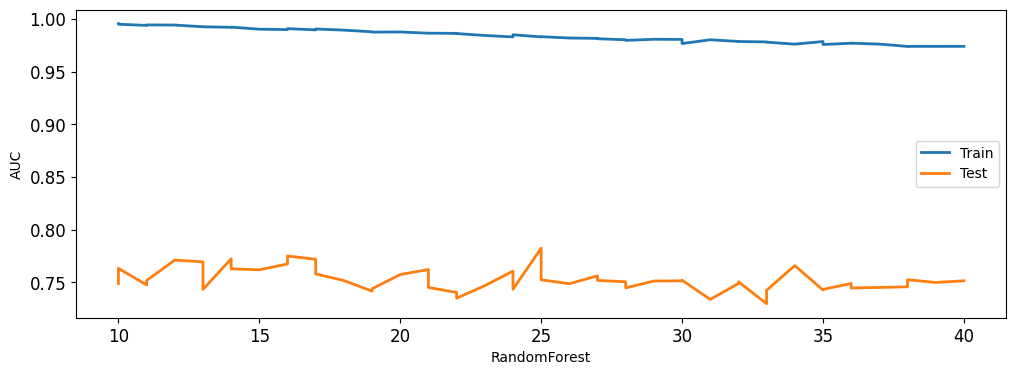

In [103]:
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
    model.fit(X_train_smote, y_train_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_smote)
    train_auc = roc_auc_score(y_train_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

### Classification Report

In [104]:
from sklearn.metrics import classification_report

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       906
           1       0.15      0.12      0.13       179

    accuracy                           0.74      1085
   macro avg       0.49      0.49      0.49      1085
weighted avg       0.72      0.74      0.73      1085



Berikut adalah insight dari classification report:

- **Presisi (Precision)**: Presisi untuk kelas 0 (tidak churn) adalah 0.83, yang berarti sebagian besar prediksi yang dilakukan untuk kelas ini adalah benar. Namun, presisi untuk kelas 1 (churn) hanya 0.16, yang menunjukkan bahwa sebagian besar prediksi positif untuk kelas churn adalah false positive.

- **Recall**: Recall untuk kelas 0 adalah 0.86, yang menunjukkan bahwa model dapat mengidentifikasi sebagian besar kasus kelas 0 dengan benar. Namun, recall untuk kelas 1 adalah 0.13, yang mengindikasikan bahwa model memiliki kesulitan dalam mengidentifikasi sebagian besar kasus kelas 1.

- **F1-Score**: F1-score adalah ukuran seimbang antara presisi dan recall. Untuk kelas 0, F1-score adalah 0.85, yang menunjukkan seimbang yang baik antara presisi dan recall. Namun, F1-score untuk kelas 1 hanya 0.14, yang mencerminkan kinerja rendah dalam mengidentifikasi kelas 1.

- **Accuracy**: Akurasi keseluruhan model adalah 0.74, yang menunjukkan bahwa model benar dalam memprediksi sekitar 74% dari seluruh sampel. Namun, akurasi saja mungkin tidak mencerminkan kinerja yang baik, terutama jika ada ketidakseimbangan kelas seperti dalam kasus ini.

- **Support**: Ini adalah jumlah sampel yang mendukung masing-masing kelas.

- **Macro Avg dan Weighted Avg**: Ini adalah rata-rata dari metrik-metrik di atas untuk semua kelas. Macro Avg memberikan bobot yang sama pada setiap kelas, sementara Weighted Avg memberikan bobot berdasarkan jumlah sampel dalam setiap kelas.

Insight utama adalah model mungkin mengalami kesulitan dalam mengidentifikasi kasus churn (kelas 1), yang tercermin dalam nilai rendah untuk presisi, recall, dan F1-score untuk kelas tersebut. Diperlukan perhatian lebih lanjut untuk meningkatkan kinerja model dalam mengidentifikasi kasus churn, mungkin dengan melakukan penyesuaian model atau menggabungkan strategi oversampling atau undersampling untuk mengatasi ketidakseimbangan kelas.

## Feature Importance

> Indented block

> Indented block





In [107]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.4 MB/s eta 0:00:00


In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

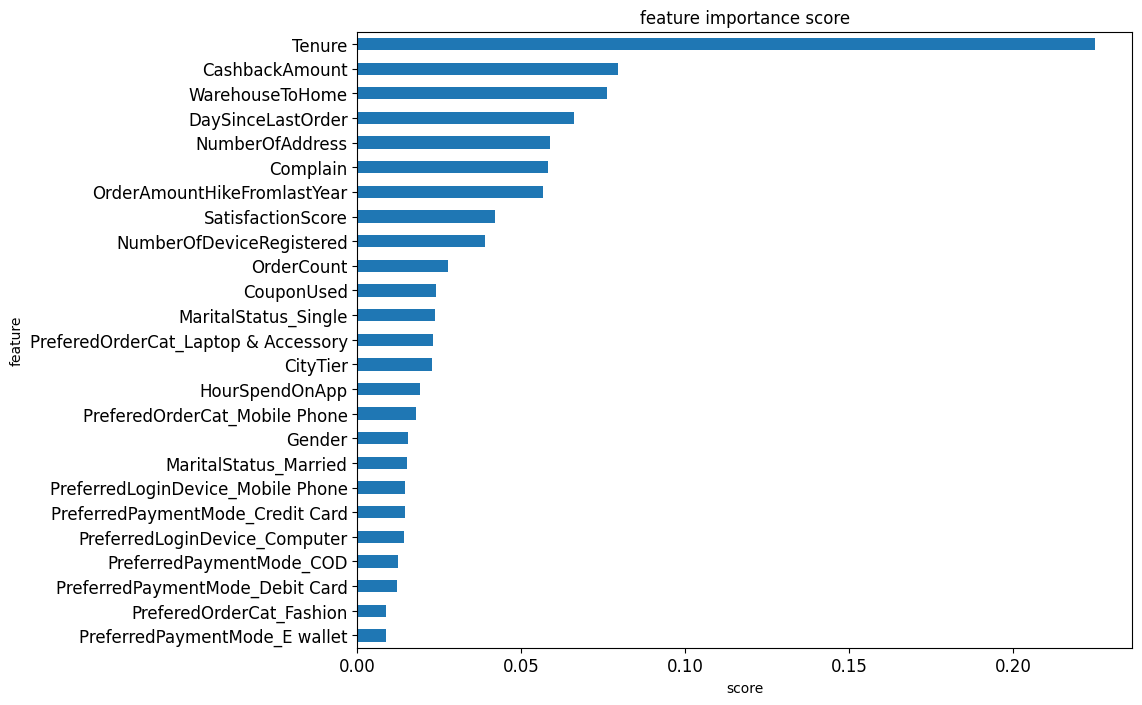

In [109]:
show_feature_importance(rf)

Insight top 10 feature : 1. tenure 2.Cashback Amount 3.Warehouse to home 4.Day since last order 5.Number of address 6. complaint 7. Order amount hike from last year 8.Satisfaction score 9.Number of device registered 10.Order count

Dari hasil feature importance dapat terlihat bahwa tenure
mempunyai pengaruh terbesar dalam aktivitas churn. Maka dari itu pihak e-comm mungkin dapat memberikan insentif atau promosi khusus kepada pelanggan yang telah berlangganan untuk jangka waktu yang lebih lama untuk mempertahankan mereka.

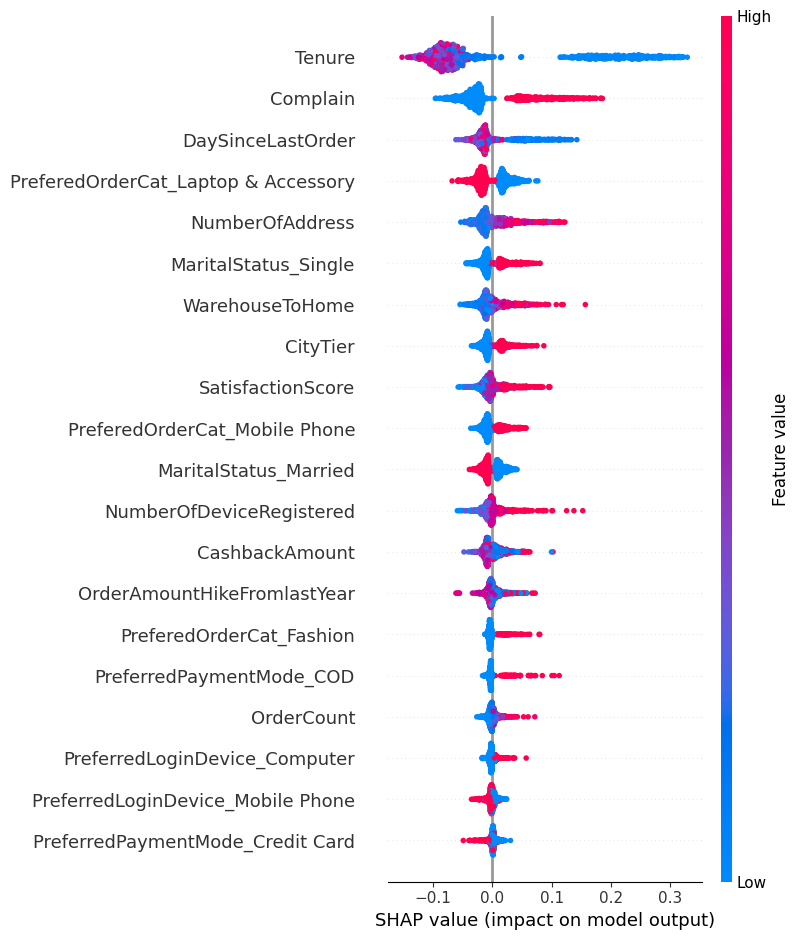

In [110]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)


Fitur penting

Fitur Tenure sangat berpengaruh dalam mengidentifikasi kecenderungan churn pelanggan. Semakin kecil tenornya, semakin besar kemungkinan pelanggan mengalami churn. Fitur Complain juga mempengaruhi kecenderungan churn pelanggan. Semakin tinggi tingkat pengaduan, semakin tinggi pula kecenderungan untuk melakukan churn.

Rekomendasi

Meningkatkan service level dalam penanganan keluhan pelanggan melalui penyempurnaan produk atau layanan yang diberikan seperti otomatisasi layanan pelanggan dan live chat.